<h1 style="text-align:center;">Fractional Brownian Motion</h1>

Source : [Ton Dieker](http://www.columbia.edu/~ad3217/fbm/thesisold.pdf)

## Sumary :

* [**1.Theory and definitions**](#0)
    * [1.1. Definitions](#0_1)
    * [1.2. Covariances](#0_2)
    * [1.3. Spectral densities](#0_3)
* [**2.Simulation methods**](#1)
    * [2.1. Hosking method](#1_1)
    * [2.2. Cholesky method](#1_2)
    * [2.3. Davies and Harte method](#1_3)

<a id='0'></a>
# 1. Theory and definitions :

<a id='0_1'></a>
# 1.1 Definitions :

Let us consider a probability space $(\Omega,\mathcal{F},\mathbb{P})$ supporting a standard Brownian motion $(B(t))_{t\in\mathbb{R}}$.  
For a Hurst parameter $H \in (0,1)$, the fractional Brownian motion $B_H(t)$ admits the following Mandelbrot–Van Ness representation:

$$
\boxed{
B_H(t)
:=
\frac{1}{\Gamma\!\left(H+\frac{1}{2}\right)}
\left(
\int_{-\infty}^{0}
\Big[(t-s)^{H-\frac{1}{2}} - (-s)^{H-\frac{1}{2}}\Big]\, dB(s)
+
\int_{0}^{t}
(t-s)^{H-\frac{1}{2}}\, dB(s)
\right)
}
$$

*Remark :*  
*Although the first integral is improper and the integrand is not Lebesgue-integrable in general, it is well defined as a Wiener integral because it is interpreted as an $L^2(\Omega)$ limit and the kernel* $(t-s)^{H-\frac12} - (-s)^{H-\frac12}$ *belongs to $L^2((-\infty,0])$, the subtraction ensuring integrability at $-\infty$.*

*Problem :*  
*Although one could truncate the integral at a large negative bound and approximate it by a Riemann sum with Brownian increments, this naive approach is numerically inefficient because the kernel has long memory, leading to slow convergence, high computational cost, and loss of precision due to cancellation effects.*

---

<a id='0_2'></a>
# 1.2 Covariances :

A normalized fractional Brownian motion 
$B_H=\{B_H(t): 0 \le t < \infty\}$ with $0<H<1$ is uniquely characterized by the following properties:

- $B_H(t)$ has stationary increments;

- $B_H(0)=0$, and $\mathbb{E}[B_H(t)] = 0$ for $t \ge 0$;

- $\mathbb{E}[B_H^2(t)] = t^{2H}$ for $t \ge 0$;

- $B_H(t)$ has a Gaussian distribution for $t>0$.

The covariance function of the fractional Brownian motion $B_H$ is given by

$$
\rho(s,t)
=
\mathbb{E}\big[B_H(s) B_H(t)\big]
=
\frac{1}{2}
\left(
t^{2H} + s^{2H} - |t-s|^{2H}
\right),
\qquad s,t \ge 0.
$$

This covariance structure completely characterizes $B_H$ as a centered Gaussian process and highlights the dependence between its increments.

The autocovariance function of the fractional Gaussian noise (i.e. the increments of the fractional Brownian motion) is given by

$$
\gamma(k)
=
\frac{1}{2}
\left(
|k-1|^{2H}
- 2|k|^{2H}
+ |k+1|^{2H}
\right),
\qquad k \in \mathbb{Z}.
$$


---

<a id='0_3'></a>
# 1.3 Spectral densities :

For stationary stochastic processes, the spectral density is defined for frequencies $-\pi \le \lambda \le \pi$ by

$$
f(\lambda)
=
\sum_{j=-\infty}^{\infty}
\gamma(j)\,\exp(i j \lambda),
$$

where $\gamma(\cdot)$ denotes the autocovariance function.  
The autocovariance function can be recovered through the inversion formula

$$
\gamma(j)
=
\frac{1}{2\pi}
\int_{-\pi}^{\pi}
f(\lambda)\,\exp(-i j \lambda)\,d\lambda.
$$

In this report, we are particularly interested in the spectral density of fractional Gaussian noise, which is given by

$$
\boxed{
f(\lambda)
=
2 \sin(\pi H)\,\Gamma(2H+1)\,(1-\cos\lambda)
\left[
|\lambda|^{-2H-1} + B(\lambda,H)
\right]}
$$

where $B(\lambda,H)=\sum_{j=1}^{\infty}\left[(2\pi j + \lambda)^{-2H-1}+(2\pi j - \lambda)^{-2H-1}\right]$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='1'></a>
# 2. Simulation methods :

The increments are stationary, the goal of each method is to simulate increments $(X_i)_{i \leq n}$ where :

$$
\boxed{
X_i = B_i^H - B_{i-1}^H
}
$$

<a id='1_1'></a>
## 2.1 Hosking method : (Durbin / Levinson method)

Let $(X_t)$ be a weakly stationary time series with autocovariance function $\gamma(k)$.

The covariance matrix $\Gamma_n$ associated with the vector
$$
(X_1,\dots,X_n)^\top
$$
is defined by

$$
\Gamma(n)
=
\begin{pmatrix}
\gamma(0)   & \gamma(1)   & \gamma(2)   & \cdots & \gamma(n-1) \\
\gamma(1)   & \gamma(0)   & \gamma(1)   & \cdots & \gamma(n-2) \\
\gamma(2)   & \gamma(1)   & \gamma(0)   & \cdots & \gamma(n-3) \\
\vdots      & \vdots      & \vdots      & \ddots & \vdots \\
\gamma(n-1) & \gamma(n-2) & \gamma(n-3) & \cdots & \gamma(0)
\end{pmatrix}.
$$


**Induction relation :**



Separating the **new variable** $X_n$ from the previous $n$ components gives the block decomposition :

$$
\Gamma(n+1)
=
\begin{pmatrix}
\Gamma(n) & c(n)^{\top} \\
c(n) & 1
\end{pmatrix}.
$$

where : $c(n) = \begin{pmatrix}\gamma(n) \\\vdots \\\gamma(1)\end{pmatrix}$

---

#### Conditional distribution of $X_{n+1}$ given $(X_n,\cdots , X_1)$ :


Since the vector is jointly Gaussian, the conditional distribution is Gaussian:
$$
X_{n+1}\mid (X_1,\dots,X_n)\ \sim\ \mathcal{N}(\mu_n,\sigma_n^2),
$$

with :



$$
\mu_n = c(n)^\top \Gamma(n)^{-1} \begin{pmatrix}
X_1\\ \vdots\\ X_n
\end{pmatrix},
\qquad
\sigma_n^2 = 1 - c(n)^\top \Gamma(n)^{-1} c(n).
$$

---


#### Recurrence between $\Gamma(n+1)^{-1}$ and $\Gamma(n)^{-1}$

Starting from the block decomposition
$$
\Gamma(n+1)
=
\begin{pmatrix}
\Gamma(n) & c(n)^{\top} \\
c(n) & 1
\end{pmatrix},
\qquad
\sigma_n^2 = 1 - c(n)^\top \Gamma(n)^{-1} c(n),
$$
the block inverse formula gives
$$
\Gamma(n+1)^{-1}
=
\begin{pmatrix}
\Gamma(n)^{-1} + \dfrac{\Gamma(n)^{-1}c(n)\,c(n)^\top\Gamma(n)^{-1}}{\sigma_n^2}
&
-\dfrac{\Gamma(n)^{-1}c(n)}{\sigma_n^2}
\\[10pt]
-\dfrac{c(n)^\top\Gamma(n)^{-1}}{\sigma_n^2}
&
\dfrac{1}{\sigma_n^2}
\end{pmatrix}
$$

---

In [13]:
# ====================== Hosking method : (Durbin / Levinson method) ====================== #
def simul_BM_hosking(T: float, N: int, h: float):
    """
    Simulate 1 trajectory of fractional Brownian motion on [0,T] using Hosking (via fGn then cumulative sum).

    INPUTS
    - T : time horizon
    - N : number of increments (so N+1 time points)
    - h : Hurst parameter in (0,1)
    - seed : optional RNG seed

    OUTPUTS
    - t : time grid, shape (N+1,)
    - X : fractional Gaussian noise sample (unit-variance convention), length N  (X_1,...,X_N)
    - Y : fractional Brownian motion sample, length N+1 (Y_0,...,Y_N)
    """

    # Autocov function of fGn (unit step, unit variance: gamma(0)=1)
    def autocov(k: int, h: float) -> float:
        k = int(abs(k))
        return 0.5 * (abs(k - 1) ** (2 * h) - 2 * (abs(k) ** (2 * h)) + abs(k + 1) ** (2 * h))

    # Induction function of Gamma
    def next_Gamma(c: np.ndarray, Gamma: np.ndarray) -> np.ndarray:
        """
        Build Gamma(n+1) from Gamma(n) with the block formula (new variable appended at the end):
            Gamma(n+1) = [[Gamma(n), c],
                          [c^T     , 1]]
        """
        c = c.reshape(-1, 1)  # (n,1)
        return np.block([[Gamma, c],
                         [c.T,  np.array([[1.0]])]])

    # Induction function of Gamma^-1
    def next_invert_Gamma(c: np.ndarray, invert_Gamma: np.ndarray) -> tuple[np.ndarray, float]:
        """
        Update Gamma(n+1)^(-1) from Gamma(n)^(-1) using the block-inverse formula.

        Uses only:
        - invert_Gamma = Gamma(n)^(-1)
        - c           = Cov((X_1,...,X_n), X_{n+1})
        - sigma_square = 1 - c^T Gamma(n)^(-1) c
        """
        c = c.reshape(-1, 1)                      # (n,1)
        v = invert_Gamma @ c                      # (n,1)
        sigma_square = float(1.0 - (c.T @ v))     # scalar

        # Safety (numerical): should be > 0
        if sigma_square <= 0:
            raise ValueError(f"sigma_square became non-positive ({sigma_square}). Check indexing / numerical stability.")

        upper_left  = invert_Gamma + (v @ v.T) / sigma_square
        upper_right = -v / sigma_square
        lower_left  = upper_right.T
        lower_right = np.array([[1.0 / sigma_square]])

        inv_next = np.block([[upper_left,  upper_right],
                             [lower_left,  lower_right]])
        return inv_next, sigma_square

    # ------------------------------------------------------------------
    # Simulate fGn X_1,...,X_N (gamma(0)=1 convention)
    # ------------------------------------------------------------------
    X = []  # will store [X_1,...,X_N]

    # Gamma(1) and its inverse for (X_1)
    Gamma = np.array([[1.0]])
    invert_Gamma = np.array([[1.0]])

    # Draw X_1 ~ N(0,1)
    X.append(float(np.random.normal(loc=0, scale=1)))

    for n in range(1, N):  # currently have X_1,...,X_n ; generate X_{n+1}
        # Build c(n) = (gamma(n),...,gamma(1))^T  (matches ordering (X_1,...,X_n))
        c = np.array([autocov(n + 1 - j, h) for j in range(1, n + 1)], dtype=float)  # length n

        # Conditional mean / variance
        X_past = np.array(X, dtype=float).reshape(-1, 1)      # (n,1)
        mu = float(c.reshape(1, -1) @ (invert_Gamma @ X_past))
        sigma_square = float(1.0 - (c.reshape(1, -1) @ (invert_Gamma @ c.reshape(-1, 1))))

        if sigma_square <= 0:
            raise ValueError(f"sigma_square became non-positive ({sigma_square}). Check indexing / numerical stability.")

        # Sample next
        next_x = np.random.normal(loc=mu, scale=np.sqrt(sigma_square))
        X.append(next_x)

        # Update Gamma and Gamma^{-1} (for next step)
        Gamma = next_Gamma(c, Gamma)
        invert_Gamma, _ = next_invert_Gamma(c, invert_Gamma)

    # ------------------------------------------------------------------
    # Convert fGn to fBm by cumulative sum with scaling (dt^h)
    # ------------------------------------------------------------------
    dt = T / N
    scale = dt ** h

    t = np.linspace(0.0, T, N + 1)
    Y = np.zeros(N + 1)
    for k in range(1, N + 1):
        Y[k] = Y[k - 1] + scale * X[k - 1]  # X[k-1] = X_k in 1-based notation

    return t, np.array(X), Y

/var/folders/28/1h3z3mcs1gxg23mnjw1zj_n00000gn/T/ipykernel_49367/2055703986.py:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu = float(c.reshape(1, -1) @ (invert_Gamma @ X_past))
/var/folders/28/1h3z3mcs1gxg23mnjw1zj_n00000gn/T/ipykernel_49367/2055703986.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_square = float(1.0 - (c.reshape(1, -1) @ (invert_Gamma @ c.reshape(-1, 1))))
/var/folders/28/1h3z3mcs1gxg23mnjw1zj_n00000gn/T/ipykernel_49367/2055703986.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befor

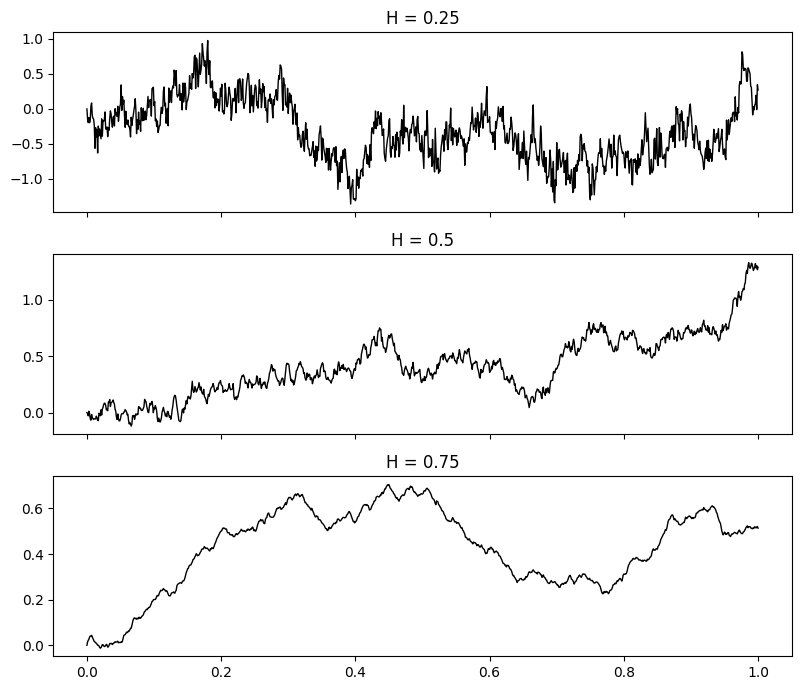

In [18]:
# ====================== TEST : Hosking simulation ====================== #

# Parameters
T = 1.0
N = 1000
hurst_list = [0.25, 0.5, 0.75]

fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)

for ax, H in zip(axes, hurst_list):
    t, X, Y = simul_BM_hosking(T=T, N=N, h=H)
    ax.plot(t, Y, color="black", linewidth=1)
    ax.set_title(f"H = {H}")
    ax.grid(False)

plt.tight_layout()
plt.show()

<a id='1_2'></a>
## 2.2 Cholesky method

This method consists in working with the covariance matrix $\Gamma(n)$ defined by

$$
\Gamma(n)
=
\begin{pmatrix}
\gamma(0)   & \gamma(1)   & \gamma(2)   & \cdots & \gamma(n-1) \\
\gamma(1)   & \gamma(0)   & \gamma(1)   & \cdots & \gamma(n-2) \\
\gamma(2)   & \gamma(1)   & \gamma(0)   & \cdots & \gamma(n-3) \\
\vdots      & \vdots      & \vdots      & \ddots & \vdots \\
\gamma(n-1) & \gamma(n-2) & \gamma(n-3) & \cdots & \gamma(0)
\end{pmatrix}.
$$

We know that the matrix $\Gamma(n)$ is symmetric positive definite, i.e.
$\Gamma(n) \in S_n^{++}(\mathbb{R})$.  
Therefore, by the Cholesky decomposition, there exists a unique lower triangular matrix $L$ with positive diagonal entries such that

$$
\Gamma(n) = LL^{\top}.
$$

---

### Construction of the Cholesky matrix

Let $L = (l_{ij})$ be the lower triangular matrix.  
Since $\Gamma(n) = LL^{\top}$, the coefficients satisfy

$$
\gamma(i-j)
=
\sum_{k=0}^{j} l_{ik} l_{jk},
\qquad j \le i.
$$

We can construct the folowing induction with initial parameters $l_{00} = \sqrt{\gamma(0)}$, &nbsp;&nbsp;&nbsp; $l_{i0} = \frac{\gamma(i)}{l_{00}}$ and the recursive formula :

For $1 \le j \le i-1$ (left term) and $i = j$ (diagonal term) :

$$
l_{ij}
=
\frac{1}{l_{jj}}
\left(
\gamma(i-j)
-
\sum_{k=0}^{j-1} l_{ik} l_{jk}
\right)

\quad

l_{ii}
=
\sqrt{
\gamma(0)
-
\sum_{k=0}^{i-1} l_{ik}^2
}

$$


---

### Simulation of the Gaussian vector

Let

$$
V = (V_0,\dots,V_n)^\top
$$

be a vector of i.i.d. standard normal random variables, $V_i \sim \mathcal N(0,1)$.

Define

$$
X = LV.
$$

Then

$$
\mathrm{Cov}(X)
=
L\,\mathrm{Cov}(V)\,L^{\top}
=
LL^{\top}
=
\Gamma(n).
$$

Hence the vector $X$ has the desired covariance structure.

---

In [19]:
# =============================== Cholesky method =============================== #
def simul_BM_cholesky(T: float, N: int, h: float):
    """
    Simulate 1 trajectory of fractional Brownian motion on [0,T] using Cholesky (via fGn then cumulative sum).

    INPUTS
    - T : time horizon
    - N : number of increments (so N+1 time points)
    - h : Hurst parameter in (0,1)
    - seed : optional RNG seed

    OUTPUTS
    - t : time grid, shape (N+1,)
    - X : fractional Gaussian noise sample (unit-variance convention), length N  (X_1,...,X_N)
    - Y : fractional Brownian motion sample, length N+1 (Y_0,...,Y_N)
    """

    # Autocov function of fGn (unit step, unit variance: gamma(0)=1)
    def autocov(k: int, h: float) -> float:
        k = int(abs(k))
        return 0.5 * (abs(k - 1) ** (2 * h) - 2 * (abs(k) ** (2 * h)) + abs(k + 1) ** (2 * h))

    # Build Gamma(n) (Toeplitz) from gamma(|i-j|)
    def build_Gamma(N: int, h: float) -> np.ndarray:
        """
        Build the covariance matrix Gamma(N) associated with (X_1,...,X_N)^T:
            Gamma[i,j] = gamma(|i-j|), 0 <= i,j <= N-1
        """
        Gamma = np.empty((N, N), dtype=float)
        for i in range(N):
            for j in range(N):
                Gamma[i, j] = autocov(i - j, h)
        return Gamma

    # ------------------------------------------------------------------
    # Simulate fGn X_1,...,X_N (gamma(0)=1 convention)
    # ------------------------------------------------------------------
    # Covariance matrix and its Cholesky factor
    Gamma = build_Gamma(N, h)

    # Safety (numerical): ensure SPD in practice (Cholesky will fail otherwise)
    try:
        L = np.linalg.cholesky(Gamma)  # lower triangular, Gamma = L L^T
    except np.linalg.LinAlgError as e:
        raise ValueError(
            "Cholesky failed: Gamma is not numerically positive definite for these parameters / N. "
            "Try smaller N, add a small jitter on the diagonal, or use Hosking / Davies-Harte."
        ) from e

    # Sample V ~ N(0, I) and set X = L V  => Cov(X)=Gamma
    V = np.random.normal(loc=0.0, scale=1.0, size=N)
    X = L @ V  # length N, corresponds to (X_1,...,X_N)

    # ------------------------------------------------------------------
    # Convert fGn to fBm by cumulative sum with scaling (dt^h)
    # ------------------------------------------------------------------
    dt = T / N
    scale = dt ** h

    t = np.linspace(0.0, T, N + 1)
    Y = np.zeros(N + 1)
    for k in range(1, N + 1):
        Y[k] = Y[k - 1] + scale * X[k - 1]  # X[k-1] = X_k in 1-based notation

    return t, np.array(X), Y

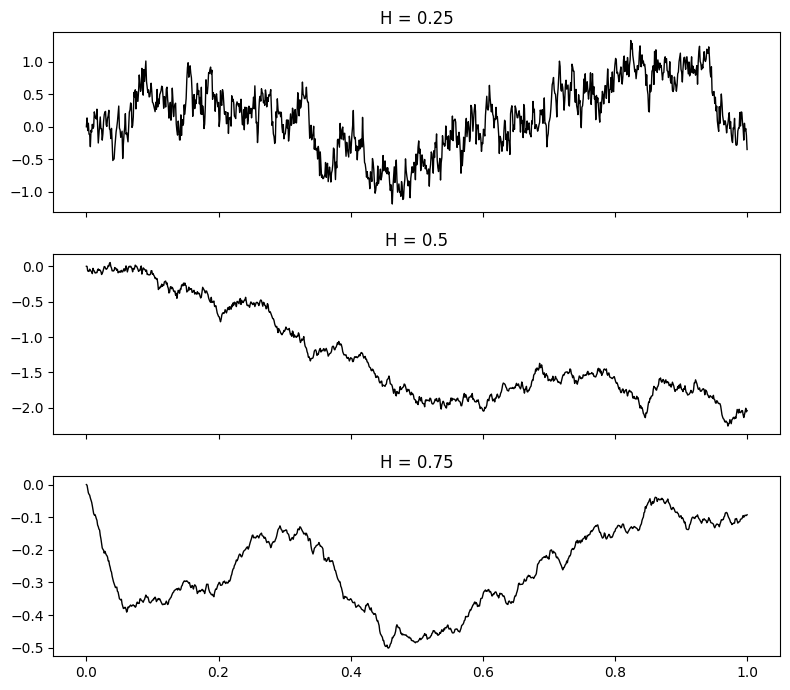

In [ ]:
# ====================== TEST : Cholesky simulation ====================== #

# Parameters
T = 1.0
N = 1000
hurst_list = [0.25, 0.5, 0.75]

fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)

for ax, H in zip(axes, hurst_list):
    t, X, Y = simul_BM_cholesky(T=T, N=N, h=H)
    ax.plot(t, Y, color="black", linewidth=1)
    ax.set_title(f"H = {H}")
    ax.grid(False)

plt.tight_layout()
plt.show()

<a id='1_3'></a>
## 2.3 Davies–Harte method (spectral approach)

The objective is to simulate a Gaussian vector with a prescribed covariance structure, corresponding to the increments of a fractional Brownian motion.

The Davies–Harte method combines two ideas:

1. simulation via a covariance square root,
2. Fourier diagonalization of circulant matrices.

This allows an exact simulation with complexity $O(N\log N)$.

---

### Gaussian simulation via covariance square root

Let $M$ be a covariance matrix and let $Z \sim \mathcal N(0, I)$.

If we define $X = A Z$, then $\mathrm{Cov}(X) = A A^\top$.

Hence the problem reduces to finding a matrix $A = M^{1/2}$ such that $M = A A^\top$.

---

### Spectral viewpoint

If $M$ admits a spectral decomposition $M = U \Lambda U^*$, then a square root is given by $M^{1/2} = U \Lambda^{1/2} U^*$.

Therefore, $X = M^{1/2} Z$ provides a Gaussian vector with covariance $M$.

--- 
### Problematic :

Compute a spectral decomposition of a general matrix is very costly, this decomposition can be easier if the matrix verify some **circulant** property :

*A matrix $C \in \mathbb{C}^{m \times m}$ is called **circulant** if it is completely determined by its first row*. (All the others row are determined by a shift of the first one)

**Key idea of Davies–Harte :**

The matrix $\Gamma$ as defined in previous part is not circulant but we can embed it into a larger **circulant matrix**.

---

### Circulant embedding

We choose $m = 2N$ and we define the vector

$$
c =
(
\gamma(0),
\gamma(1),
\dots,
\gamma(N-1),
0,
\gamma(N-1),
\dots,
\gamma(1)
).
$$

The associated circulant matrix $C$ is

$$
C =
\begin{pmatrix}
c_0 & c_1 & \cdots & c_{m-1} \\
c_{m-1} & c_0 & \cdots & c_{m-2} \\
\vdots & & \ddots & \vdots \\
c_1 & c_2 & \cdots & c_0
\end{pmatrix}.
$$

Its top-left block coincides with the desired covariance matrix.

---

### Fourier diagonalization

A fundamental property of circulant matrices is that they are diagonalized by the discrete Fourier transform (DFT).

Let $F$ denote the Fourier matrix defined by

$$
F_{jk}
=
\frac{1}{\sqrt{m}}
e^{-2\pi i jk/m},
\qquad
j,k=0,\dots,m-1.
$$

Then any circulant matrix $C$ satisfies

$$
C = F^* \Lambda F,
$$

where:

- $F^*$ is the Hermitian transpose of $F$,
- $\Lambda = \mathrm{diag}(\lambda_0,\dots,\lambda_{m-1})$ is diagonal,
- the diagonal entries are the eigenvalues of $C$.



---

### Eigenvalues and FFT

The eigenvalues are obtained by applying the discrete Fourier transform to the first row $c$:

$$
\lambda_k
=
\sum_{j=0}^{m-1}
c_j e^{-2\pi i jk/m},
\qquad k=0,\dots,m-1.
$$

In vector form:

$$
\boxed{
\lambda = \mathrm{FFT}(c)
}
$$

In practice, we never build the Fourier matrix explicitly.

Instead:

- multiplication by $F$ corresponds to a **FFT**,
- multiplication by $F^*$ corresponds to an **inverse FFT**.

Hence

$$
F x = \mathrm{FFT}(x),
\qquad
F^* x = \mathrm{IFFT}(x).
$$

The FFT algorithm computes this transform with complexity

$$
O(m \log m),
$$

---

### Practical meaning

The decomposition

$$
C = F^* \Lambda F
$$

means that:

1. transform the vector into Fourier space,
2. scale each Fourier mode independently by the eigenvalues,
3. transform back.

In Fourier space, the covariance matrix becomes diagonal.

---

### Simulation method

Let $Z$ be a vector of independent standard Gaussian variables.

Define

$$
X = C^{1/2} Z
= F^* \Lambda^{1/2} F Z.
$$

**Remark :** To obtain a real-valued signal after inverse FFT, the Fourier coefficients must satisfy the Hermitian symmetry $Z_{m-k} = \overline{Z_k}$
Hence only the positive-frequency modes are independent Gaussian variables; the negative frequencies are fixed by conjugation, which guarantees a real Gaussian trajectory.

Operationally:

1. compute $Y = \mathrm{FFT}(Z)$,
2. multiply componentwise : $Y_k \leftarrow \sqrt{\lambda_k}\, Y_k$,
3. compute : $X = \mathrm{IFFT}(Y).$

The vector $X$ is Gaussian with covariance $C$.

Keeping the first $N$ components gives a sample of fractional Gaussian noise.

In [23]:
# ============================ Davies–Harte method ============================ #
def simul_BM_davies_harte(T: float, N: int, h: float):
    """
    Simulate 1 trajectory of fractional Brownian motion on [0,T] using Davies–Harte
    (via circulant embedding + FFT for fGn, then cumulative sum).

    INPUTS
    - T : time horizon
    - N : number of increments (so N+1 time points)
    - h : Hurst parameter in (0,1)
    - seed : optional RNG seed

    OUTPUTS
    - t : time grid, shape (N+1,)
    - X : fractional Gaussian noise sample (unit-variance convention), length N  (X_1,...,X_N)
    - Y : fractional Brownian motion sample, length N+1 (Y_0,...,Y_N)
    """

    # Autocov function of fGn (unit step, unit variance: gamma(0)=1)
    def autocov(k: int, h: float) -> float:
        k = int(abs(k))
        return 0.5 * (abs(k - 1) ** (2 * h) - 2 * (abs(k) ** (2 * h)) + abs(k + 1) ** (2 * h))

    # Build the circulant embedding vector c (length m=2N)
    def build_c(N: int, h: float) -> np.ndarray:
        """
        Build the embedding vector c of length m=2N:
            c = (gamma(0),...,gamma(N-1), 0, gamma(N-1),...,gamma(1)).
        This defines a circulant covariance matrix C whose top-left N×N block is Gamma(N).
        """
        gam = np.empty(N, dtype=float)
        for k in range(N):
            gam[k] = autocov(k, h)

        m = 2 * N
        c = np.empty(m, dtype=float)
        c[:N] = gam[:]                # gamma(0),...,gamma(N-1)
        c[N] = 0.0                    # middle term
        c[N + 1 :] = gam[1:][::-1]    # gamma(N-1),...,gamma(1)
        return c

    # ------------------------------------------------------------------
    # Simulate fGn X_1,...,X_N (gamma(0)=1 convention) using Davies–Harte
    # ------------------------------------------------------------------
    m = 2 * N

    # Circulant embedding first row and eigenvalues via FFT
    c = build_c(N, h)
    lam = np.fft.fft(c).real  # eigenvalues should be real for real-symmetric circulant C

    # Safety (numerical): Davies–Harte requires nonnegative eigenvalues
    tol = 1e-12
    if np.min(lam) < -tol:
        raise ValueError(
            "Davies–Harte failed: circulant embedding is not positive semidefinite "
        )
    lam = np.maximum(lam, 0.0)

    # Build a complex Gaussian vector Z in Fourier space with Hermitian symmetry,
    # so that the inverse FFT is (numerically) real.
    Z = np.empty(m, dtype=np.complex128)

    # Frequencies 0 and N must be real
    Z[0] = np.random.normal()
    Z[N] = np.random.normal()

    # For k=1,...,N-1: Z[k] = (A+iB)/sqrt(2), Z[m-k] = conj(Z[k])
    # This ensures E[Z[k] conj(Z[k])] = 1 and Hermitian symmetry.
    for k in range(1, N):
        a = np.random.normal()
        b = np.random.normal()
        zk = (a + 1j * b) / np.sqrt(2.0)
        Z[k] = zk
        Z[m - k] = np.conjugate(zk)

    # Apply the spectral square root in Fourier space and transform back.
    # With NumPy FFT conventions, the correct scaling is:
    #   X_full = sqrt(m) * ifft( sqrt(lam) * Z )
    Y_fourier = np.sqrt(lam) * Z
    X_full = (np.sqrt(m) * np.fft.ifft(Y_fourier)).real  # length m, covariance = circulant C

    # Keep first N entries -> fGn sample (X_1,...,X_N)
    X = X_full[:N]

    # ------------------------------------------------------------------
    # Convert fGn to fBm by cumulative sum with scaling (dt^h)
    # ------------------------------------------------------------------
    dt = T / N
    scale = dt ** h

    t = np.linspace(0.0, T, N + 1)
    Y = np.zeros(N + 1)
    for k in range(1, N + 1):
        Y[k] = Y[k - 1] + scale * X[k - 1]  # X[k-1] = X_k in 1-based notation

    return t, np.array(X), Y

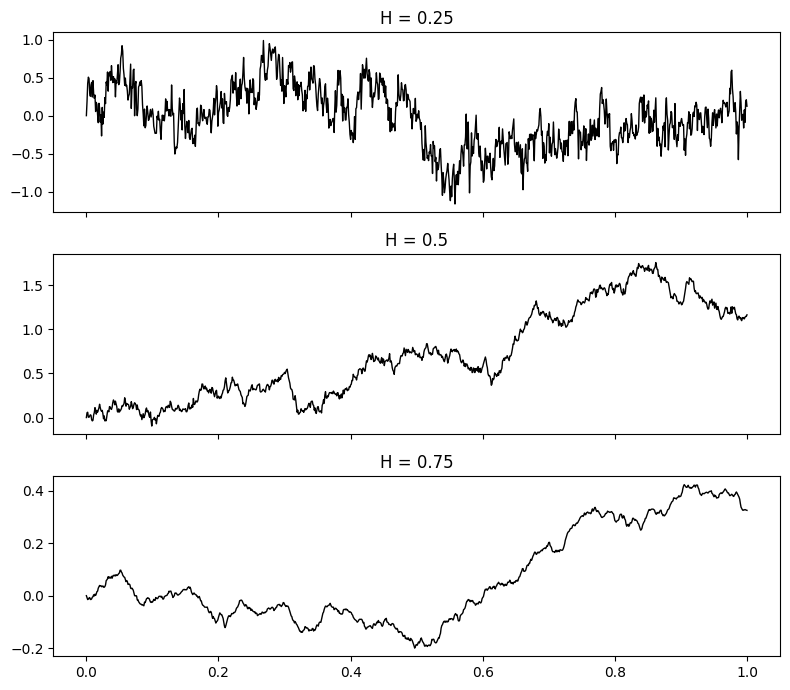

In [24]:
# ====================== TEST : DH simulation ====================== #

# Parameters
T = 1.0
N = 1000
hurst_list = [0.25, 0.5, 0.75]

fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)

for ax, H in zip(axes, hurst_list):
    t, X, Y = simul_BM_davies_harte(T=T, N=N, h=H)
    ax.plot(t, Y, color="black", linewidth=1)
    ax.set_title(f"H = {H}")
    ax.grid(False)

plt.tight_layout()
plt.show()